In [274]:
# Import the libraries
options(tidyverse.quiet = TRUE) 
library(tidyverse)
library(datasets)
library(stringr)
library(ggplot2)
library(gridExtra)
library(scales)
#library(ggthemes)
#theme_set(theme_economist())

In [275]:
# Retriving the data
df_stable <- read.csv('../Data/most_stable_job.csv', header=TRUE , sep=',')
df_2M_pop <- read.csv('../Data/2000_pop_job.csv', header=TRUE , sep=',')

In [299]:
df_stable %>% head(3)

X,job,sex,year_x,count_x,perc,year_y,count_y,std
<int>,<fct>,<fct>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
0,Apprentice - Auto Mechanic,men,1850,0,0,47.48381,1563.719,2.402134e-05
1,Apprentice - Auto Mechanic,men,1860,0,0,47.48381,1563.719,2.402134e-05
2,Apprentice - Auto Mechanic,men,1870,0,0,47.48381,1563.719,2.402134e-05


In [300]:
df_2M_pop %>% head(3)

X,level_0_x,index_x,job,sex_x,year_x,count_x,perc_x,together_x,level_0_y,index_y,sex_y,year_y,count_y,perc_y,together_y
<int>,<int>,<int>,<fct>,<fct>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>,<int>,<dbl>,<dbl>
0,765,1530,Cook,men,1850,0,0.0000000000,0.0014286650,779,1544,men,2000,2100285,0.0124926,0.02611203
1,770,1535,Cook,men,1910,0,0.0000000000,0.0067454750,779,1544,men,2000,2100285,0.0124926,0.02611203
2,768,1533,Cook,men,1880,5690,0.0003108053,0.0005722859,779,1544,men,2000,2100285,0.0124926,0.02611203


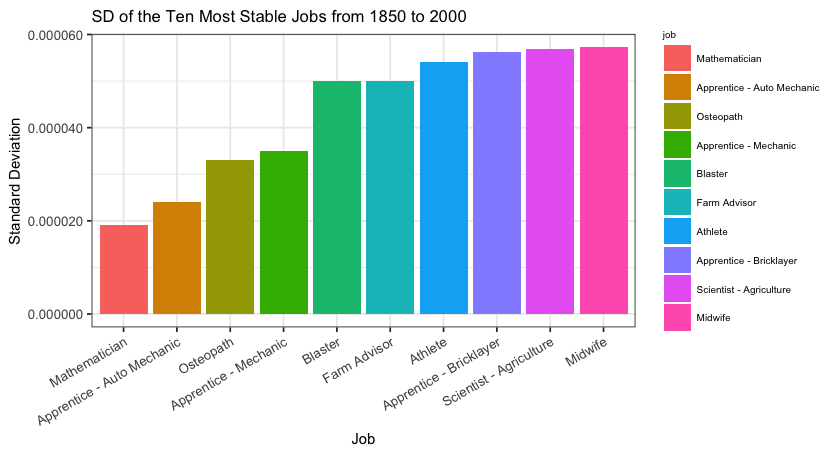

In [276]:
# Stable jobs - bar plot
wrang_stable <- df_stable %>% filter(year_x == 2000, sex == 'men') %>% arrange(std)
wrang_stable$job <- factor(wrang_stable$job, levels = wrang_stable$job[order(wrang_stable$std)])

plot_stable_bar <- wrang_stable %>% 
  ggplot(aes(x = job, y = std, fill = job)) + 
  geom_col() +
  ylab("Standard Deviation") + xlab("Job") +
  ggtitle("SD of the Ten Most Stable Jobs from 1850 to 2000") +
  scale_y_continuous(labels = comma) +
  theme_bw()+
  theme(axis.text = element_text(size = 8),
        axis.title = element_text(size = 9),
        axis.text.x = element_text(angle = 30, hjust = 1),
        plot.title = element_text(size = 10) ,
        legend.title = element_text(size = 6),
        legend.text = element_text(size = 6)
#        legend.position = "none"
        ) 

options(repr.plot.width = 7, repr.plot.height = 3.8)
plot_stable_bar
#grid.arrange(plot_stable_bar, plot_stable_line, ncol = 2)

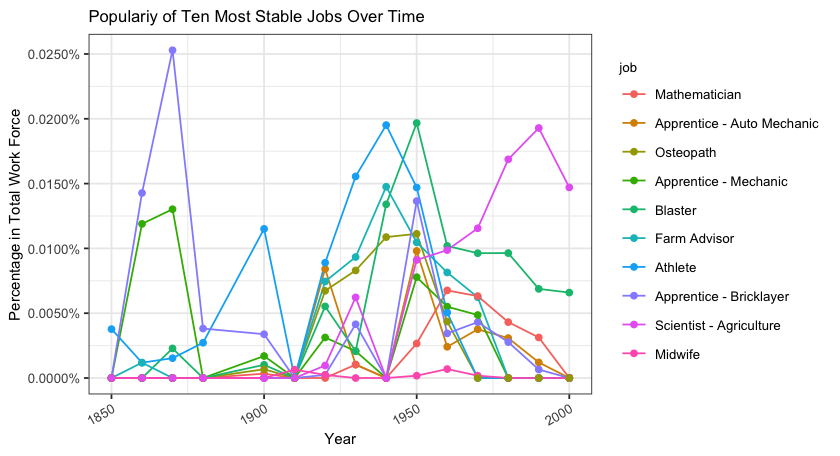

In [304]:
# Stable jobs - line plot
wrang_stable2 <- df_stable %>% filter(sex == 'men')
wrang_stable2$job <- factor(wrang_stable2$job) %>% fct_relevel(levels(wrang_stable$job))

plot_stable_line <- wrang_stable2 %>%
   ggplot(aes(x = year_x, y = perc, color = job)) +
   geom_line() +
   geom_point() +
   ylab("Percentage in Total Work Force") + xlab("Year") +
   ggtitle("Populariy of Ten Most Stable Jobs Over Time") +
   scale_y_continuous(labels = percent) +
   theme_bw()+
   theme(axis.text = element_text(size = 8),
         axis.title = element_text(size = 9),
         axis.text.x = element_text(angle = 30, hjust = 1),
         plot.title = element_text(size = 10) ,
         legend.title = element_text(size = 8),
         legend.text = element_text(size = 8)
         ) 

options(repr.plot.width = 7, repr.plot.height = 3.8)
plot_stable_line

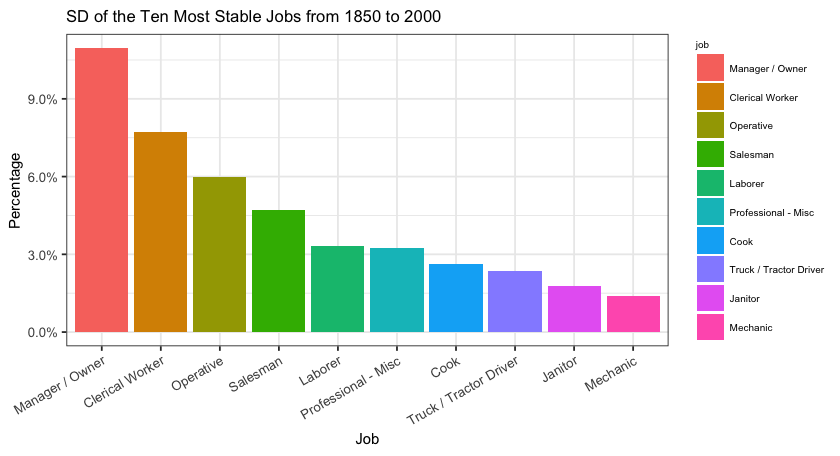

In [303]:
# Popular jobs in 2000 - bar plot
wrang_pop <- df_2M_pop %>% filter(year_x == 2000) %>% arrange(desc(together_y))
wrang_pop$job <- factor(wrang_pop$job, levels = wrang_pop$job[order(desc(wrang_pop$together_y))])

plot_pop_bar <- wrang_pop %>% 
    ggplot(aes(x = job, y = together_y, fill = job)) + 
    geom_col() +
    ylab("Percentage") + xlab("Job") +
    ggtitle("SD of the Ten Most Stable Jobs from 1850 to 2000") +
    scale_y_continuous(labels = percent) +
    theme_bw()+
    theme(axis.text = element_text(size = 8),
        axis.title = element_text(size = 9),
        axis.text.x = element_text(angle = 30, hjust = 1),
        plot.title = element_text(size = 10) ,
        legend.title = element_text(size = 6),
        legend.text = element_text(size = 6)
#        legend.position = "none"
        ) 

options(repr.plot.width = 7, repr.plot.height = 3.8)
plot_pop_bar

#grid.arrange(plot_stable_bar, plot_stable_line, ncol = 2)

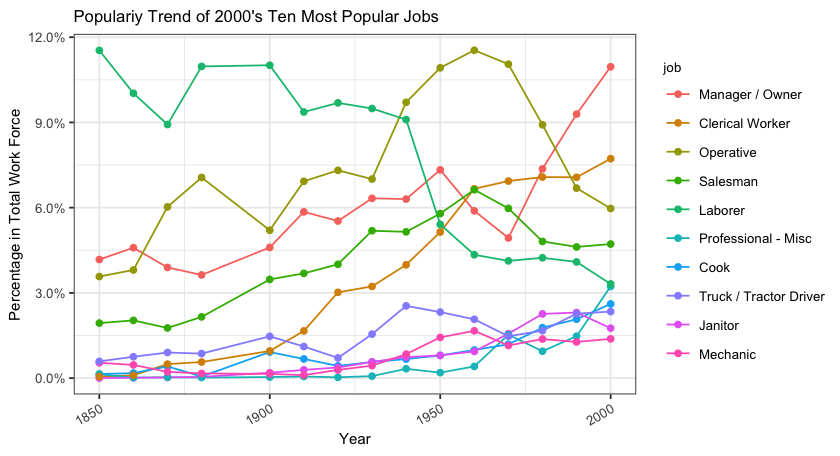

In [301]:
# Popular jobs in 2000 - line plot
wrang_pop2 <- df_2M_pop
wrang_pop2$job <- factor(wrang_pop2$job) %>% fct_relevel(levels(wrang_pop$job))
#wrang_pop2$job <- factor(wrang_pop$job)

plot_pop_line <- wrang_pop2 %>% 
   ggplot(aes(x = year_x, y = together_x, color = job)) +
   geom_line() +
   geom_point() +
   ylab("Percentage in Total Work Force") + xlab("Year") +
   ggtitle("Populariy Trend of 2000's Ten Most Popular Jobs") +
   scale_y_continuous(labels = percent) +
   theme_bw()+
   theme(axis.text = element_text(size = 8),
         axis.title = element_text(size = 9),
         axis.text.x = element_text(angle = 30, hjust = 1),
         plot.title = element_text(size = 10) ,
         legend.title = element_text(size = 8),
         legend.text = element_text(size = 8)
         ) 

options(repr.plot.width = 7, repr.plot.height = 3.8)
plot_pop_line